In [1]:
import pickle
from nilearn.glm.second_level import SecondLevelModel
from nilearn import plotting
from nilearn.plotting import plot_stat_map
import scipy.stats as st
import matplotlib.pyplot as plt
from nilearn.image import threshold_img

# open a file, where you ant to store the data
file = open('/work/balazs_folder/nbs/A2/models/first_level_all_quick.pkl', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

US1_J2KR.dcm:   0%|          | 38.0/154k [00:00<01:26, 1.77kB/s]
MR-SIEMENS-DICOM-WithOverlays.dcm:   0%|          | 125/511k [00:00<03:10, 2.68kB/s]
OBXXXX1A.dcm:   0%|          | 119/486k [00:00<02:56, 2.75kB/s]
US1_UNCR.dcm:   0%|          | 226/923k [00:00<03:47, 4.05kB/s]
color3d_jpeg_baseline.dcm:   0%|          | 1.50k/6.14M [00:00<07:34, 13.5kB/s]


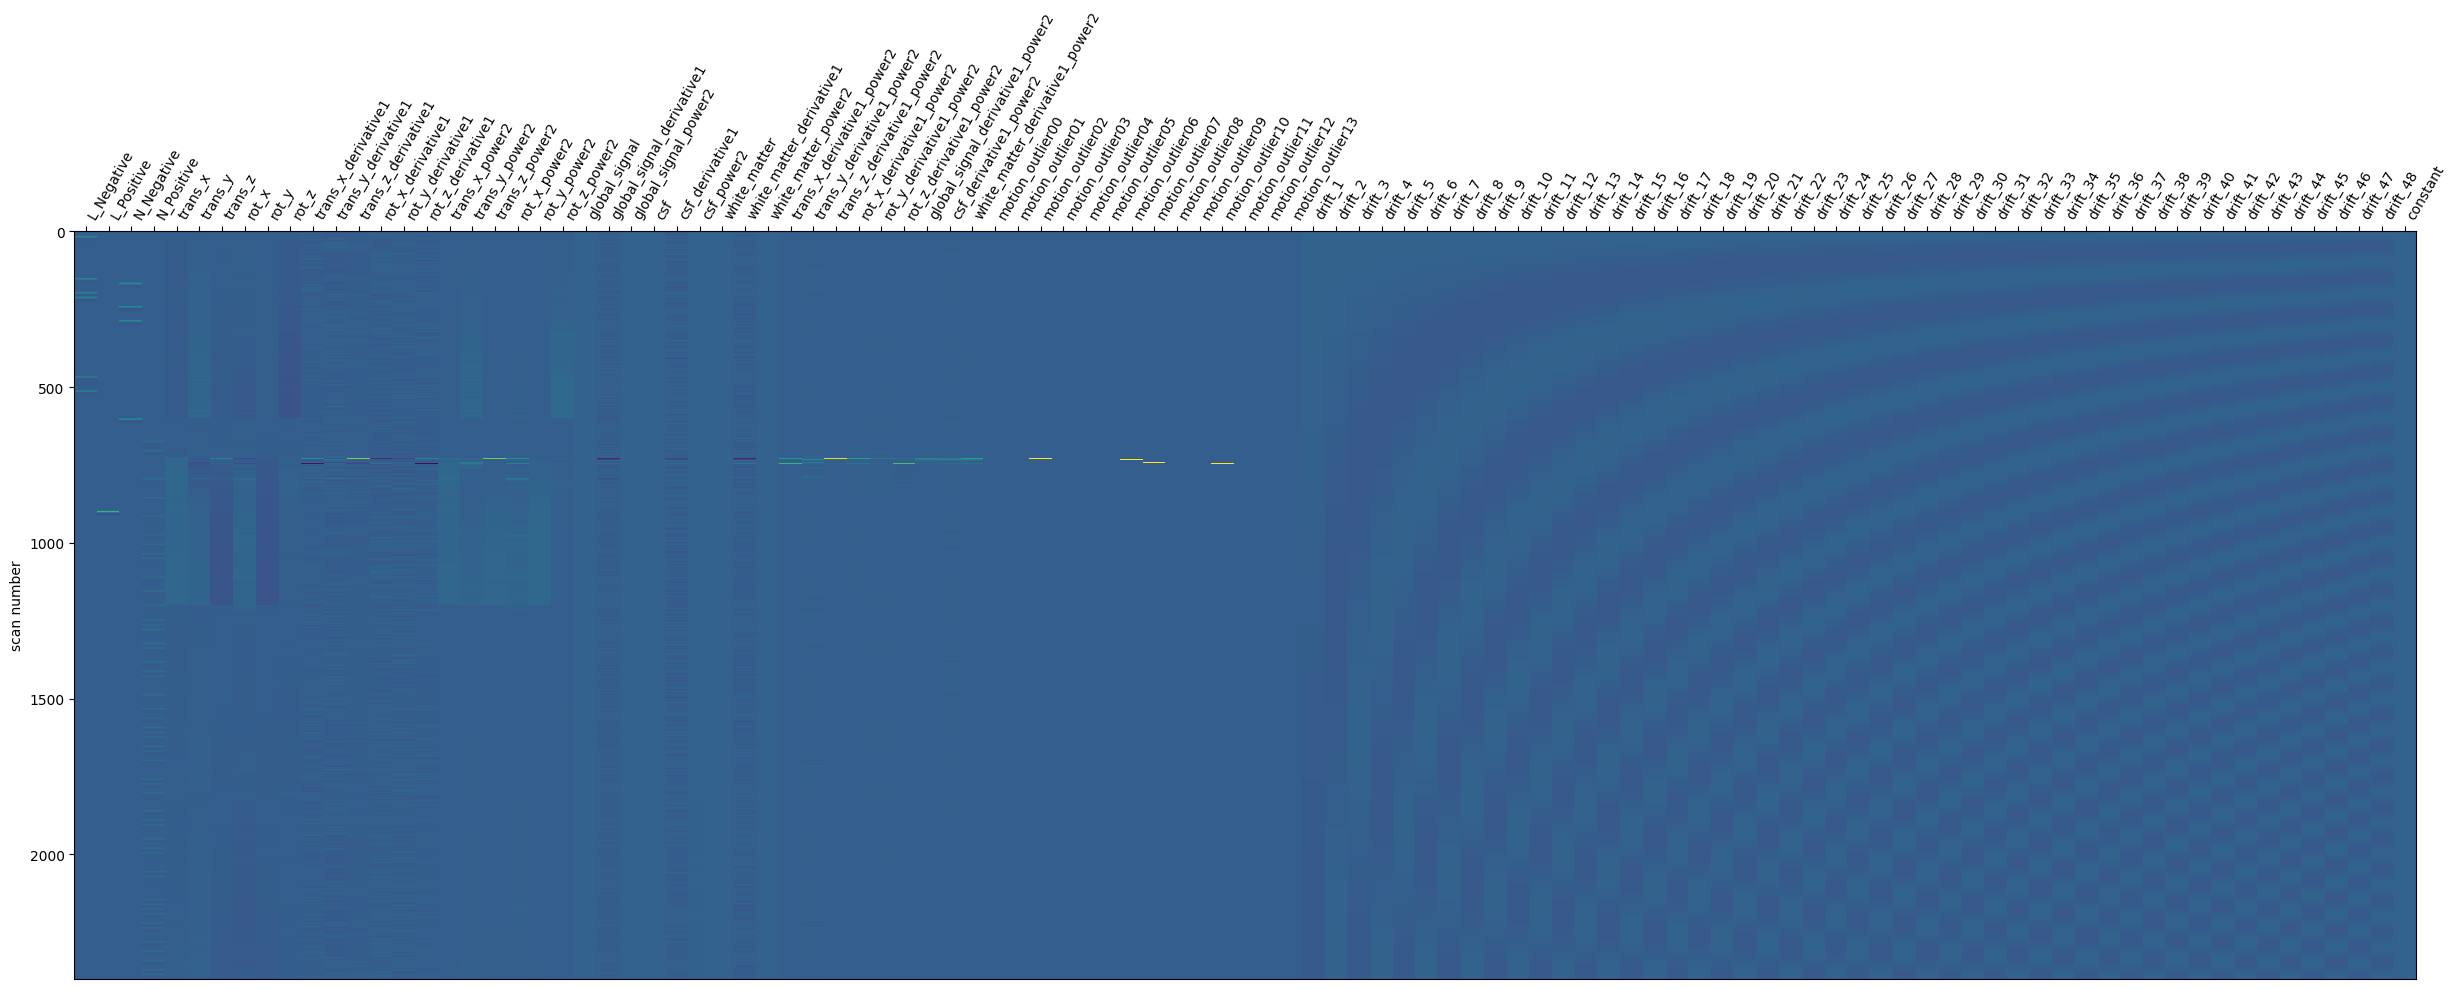

In [6]:
from nilearn.plotting import plot_design_matrix
# View the design matrix from the first session
design_matrix = data[0][1].design_matrices_[0]

#Plot the design matrix
plot_design_matrix(design_matrix)
plt.show()


In [41]:

#We will simply add the models estimated above to the second level
second_level_input = data[0]

#Adding the smoothing parameter
second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
second_level_model = second_level_model.fit(second_level_input)


contrasts = ['L_Negative - N_Negative',"L_Positive - N_Positive","L_Negative - L_Positive"]
zmap_g = second_level_model.compute_contrast(
    first_level_contrast= contrasts[2])

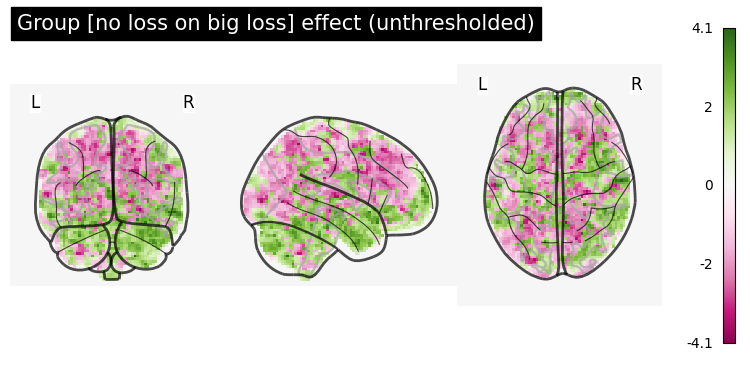

In [42]:

plotting.plot_glass_brain(zmap_g, cmap='PiYG',colorbar=True, threshold=None,
                          title='Group [no loss on big loss] effect (unthresholded)',
                          plot_abs=False)
plt.show()

In [43]:
p001uncor=st.norm.ppf(.9999)
zmap_t = threshold_img(zmap_g, threshold=p001uncor)

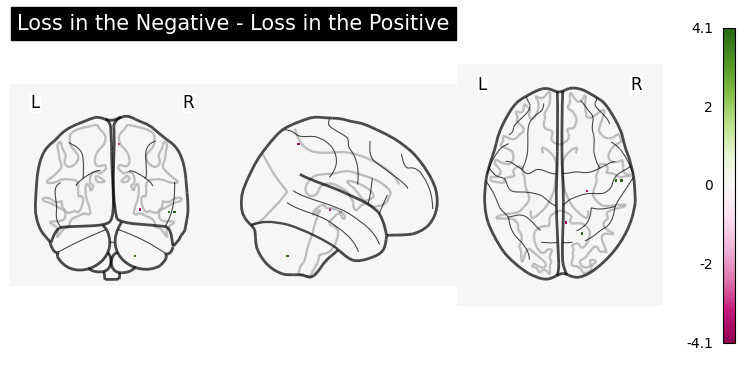

In [45]:
plotting.plot_glass_brain(zmap_t, cmap='PiYG',colorbar=True, threshold=None,
                          title="Loss in the Negative - Loss in the Positive",
                          plot_abs=False)
plt.show()

In [40]:
from atlasreader import create_output
create_output(zmap_t, cluster_extent = 5, outdir = "./results/LP_NP")

/work/balazs_folder/virt_env/lib/python3.12/site-packages/nilearn/plotting/displays/_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


In [31]:
import pandas as pd
fos = pd.read_csv("./results/LP_NP/atlasreader_clusters.csv")

In [21]:
asd = fos["harvard_oxford"]

In [24]:
pd.options.display.max_colwidth = 1000

In [32]:
fos

,cluster_id,peak_x,peak_y,peak_z,cluster_mean,volume_mm,aal,desikan_killiany,harvard_oxford
0,1.0,-5.563999,8.956001,59.0,3.962636,143.565216,100.00% Supp_Motor_Area_L,66.67% ctx-lh-superiorfrontal; 22.22% Left-Cerebral-White-Matter; 11.11% Unknown,55.56% Left_Superior_Frontal_Gyrus; 44.44% Left_Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex)
